In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow,imread
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
import tensorflow as tf
import os


In [2]:
train_df = pd.read_csv('dataset/RSNA_Annotations/RSNA_Annotations/BONEAGE/boneage_train.csv')
train_df ['ID'] = train_df['ID'].map(lambda x: f'{x}.png')
train_df['Male']= train_df['Male'].map(lambda x: 1 if (x == True) else 0)
train_df

,ID,Male,Boneage
0,1377.png,0,180
1,1378.png,0,12
2,1379.png,0,94
3,1380.png,1,120
4,1381.png,0,82
...,...,...,...
12606,15605.png,0,50
12607,15606.png,0,113
12608,15608.png,0,55
12609,15609.png,1,150


In [3]:
test_df = pd.read_csv('dataset/RSNA_Annotations/RSNA_Annotations/BONEAGE/gender_test.csv')
test_df['ID'] = test_df['ID'].map(lambda x: f'{x}.png')
test_df

,ID,Male
0,4360.png,True
1,4361.png,True
2,4362.png,True
3,4363.png,True
4,4364.png,True
...,...,...
195,4555.png,False
196,4556.png,False
197,4557.png,False
198,4558.png,False


In [4]:
val_df = pd.read_csv('dataset/RSNA_Annotations/RSNA_Annotations/BONEAGE/boneage_val.csv')
val_df['ID'] = val_df['ID'].map(lambda x: f'{x}.png')
val_df['Male']= val_df['Male'].map(lambda x: 1 if (x == True) else 0)
val_df

,ID,Male,Boneage
0,1386.png,0,30
1,1392.png,1,162
2,1397.png,0,18
3,1401.png,0,132
4,1410.png,1,57
...,...,...,...
1420,15592.png,0,42
1421,15601.png,0,132
1422,15607.png,1,186
1423,15611.png,0,120


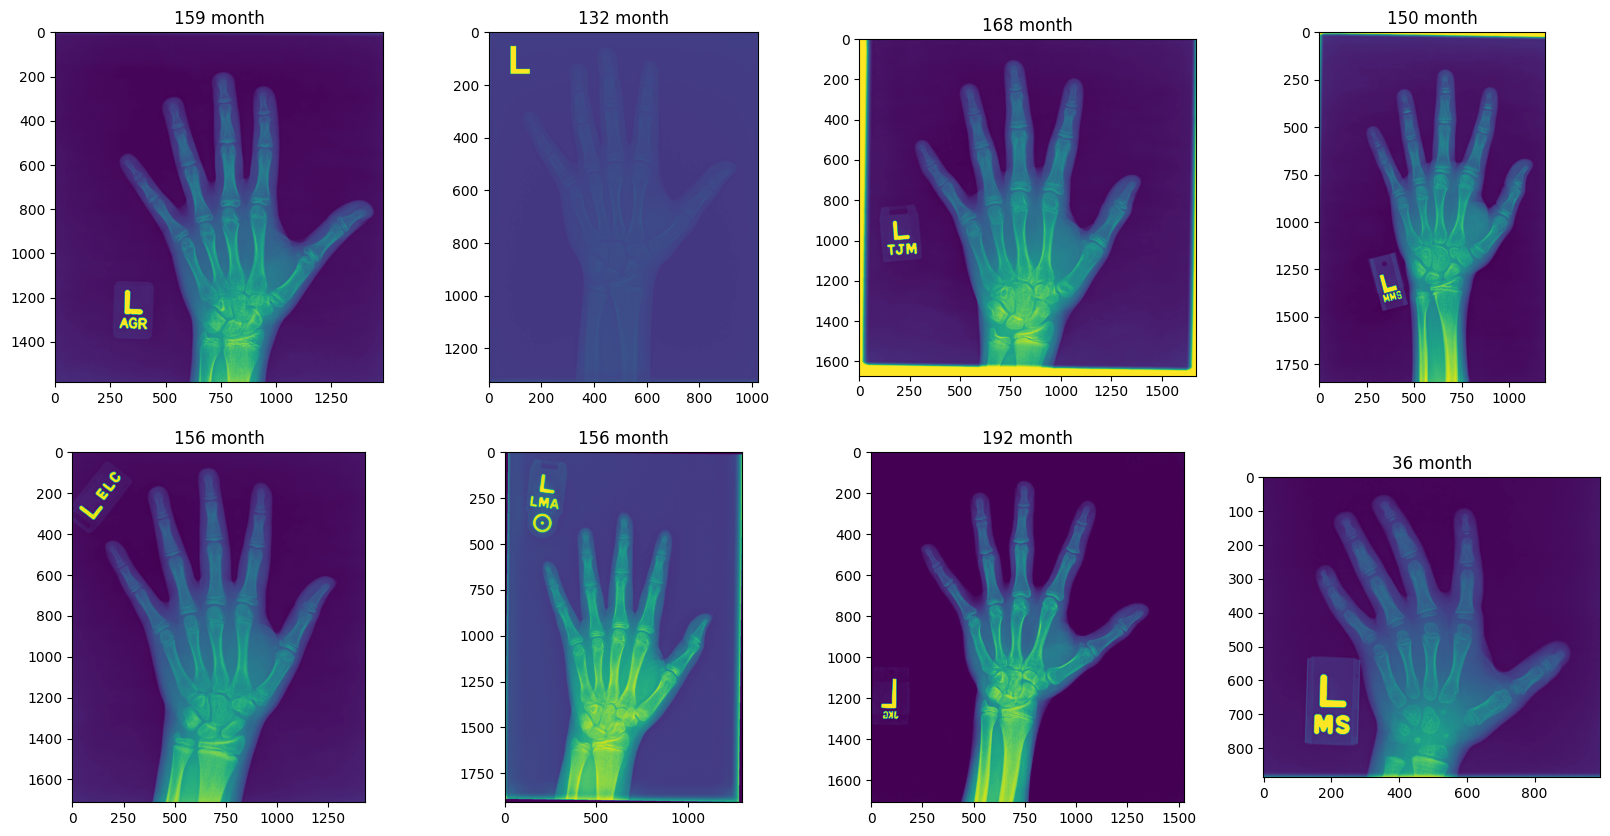

In [5]:
train_dir='dataset/RSNA_train/images'
test_dir= 'dataset/RSNA_test/images'
val_dir= 'dataset/RSNA_val/images'
sample = train_df.sample(n=8)
fig,axx = plt.subplots(2,4, figsize=(20,10))
for idd,boneage,place in zip(sample['ID'],sample['Boneage'],axx.flatten()):
    place.imshow(imread(f"{train_dir}/{idd}"))
    place.set_title(str(boneage)+' month')

In [6]:
core_dg = tf.keras.preprocessing.image.ImageDataGenerator()

train_dg = core_dg.flow_from_dataframe(
    train_df,
    directory=train_dir,
    x_col='ID',
    y_col='Boneage',
    target_size=(256,256),
    color_mode='grayscale',
    class_mode='raw',
    classes=None,
    batch_size=32,
    shuffle=True,
    save_format='png',
    interpolation='nearest',
)

Found 12611 validated image filenames.


In [7]:
test_dg = core_dg.flow_from_dataframe(
    test_df,
    x_col='ID',
    directory=test_dir,
    class_mode=None,
    )

Found 200 validated image filenames.


In [8]:
val_dg = core_dg.flow_from_dataframe(
    val_df,
    directory=val_dir,
    x_col='ID',
    y_col='Boneage',
    target_size=(256,256),
    color_mode='grayscale',
    class_mode='raw',
    classes=None,
    batch_size=32,
    shuffle=True,
    save_format='png',
    interpolation='nearest',
)

Found 1425 validated image filenames.


In [9]:
from keras.layers import Dense, MaxPooling2D, Input, Conv2D, SeparableConv2D, Dropout, BatchNormalization, Flatten, ReLU, Add, GlobalAveragePooling2D
from keras.metrics import MeanAbsoluteError
from keras.models import Model

VGG Model

In [10]:
input_shape=(256,256,1)
dropout_rate = 0.35

model_input= Input(shape=input_shape)

x = Conv2D(64,(3,3),activation='relu',padding='same')(model_input)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(10,activation='relu')(x)
model_output = Dense(1,activation='linear')(x)


In [11]:
model = Model(model_input,model_output)

model.compile(loss='mae',optimizer='adam',metrics=[MeanAbsoluteError()])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

 conv2d_7 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 512)       2359808   
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 512)       2359808   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 512)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 512)       2359808   
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 512)       2359808   
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 512)       2359808   
                                                                 
 max_pooli

In [29]:
model.fit_generator(train_dg,epochs=2)


C:\Users\prkna\AppData\Local\Temp\ipykernel_15700\2509111275.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_vgg.fit_generator(train_dg,epochs=2)


Epoch 1/2
395/395 [==============================] - 1148s 3s/step - loss: 51.0517 - mean_absolute_error: 51.0517
Epoch 2/2
395/395 [==============================] - 1105s 3s/step - loss: 33.1210 - mean_absolute_error: 33.1210


In [30]:
model.save('checkpoint_vgg.h5')

In [12]:
model.load_weights('checkpoint_vgg.h5')

In [13]:
score = model.evaluate(val_dg)

45/45 [==============================] - 105s 1s/step - loss: 34.9488 - mean_absolute_error: 34.9488


In [14]:
print(f"MAE for VGG model: {score[0]}")

MAE for VGG model: 34.94880294799805


In [15]:
import cv2

Train data prediction

In [16]:
for _,i in train_df.head(10).iterrows():
    img = cv2.imread(f"{train_dir}/{i['ID']}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    img = cv2.resize(img, (256, 256))
    img = img.reshape((1, 256, 256, 1))
    y_true =i['Boneage']
    y_pred = round(model.predict(img,verbose=0)[0][0])
    print(f"true val:{y_true}\npred val:{y_pred}\ndiff val:{abs(y_true-y_pred)}")
    print('-'*30)

true val:180
pred val:154
diff val:26
------------------------------
true val:12
pred val:144
diff val:132
------------------------------
true val:94
pred val:146
diff val:52
------------------------------
true val:120
pred val:149
diff val:29
------------------------------
true val:82
pred val:146
diff val:64
------------------------------
true val:138
pred val:148
diff val:10
------------------------------
true val:150
pred val:143
diff val:7
------------------------------
true val:156
pred val:143
diff val:13
------------------------------
true val:36
pred val:146
diff val:110
------------------------------
true val:138
pred val:146
diff val:8
------------------------------


Validation data prediction

In [17]:
for _,i in val_df.head(10).iterrows():
    img = cv2.imread(f"{val_dir}/{i['ID']}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    img = cv2.resize(img, (256, 256))
    img = img.reshape((1, 256, 256, 1))
    y_true =i['Boneage']
    y_pred = round(model.predict(img,verbose=0)[0][0])
    print(f"true val:{y_true}\npred val:{y_pred}\ndiff val:{abs(y_true-y_pred)}")
    print('-'*30)

true val:30
pred val:148
diff val:118
------------------------------
true val:162
pred val:143
diff val:19
------------------------------
true val:18
pred val:142
diff val:124
------------------------------
true val:132
pred val:145
diff val:13
------------------------------
true val:57
pred val:145
diff val:88
------------------------------
true val:150
pred val:145
diff val:5
------------------------------
true val:24
pred val:145
diff val:121
------------------------------
true val:120
pred val:145
diff val:25
------------------------------
true val:16
pred val:143
diff val:127
------------------------------
true val:120
pred val:146
diff val:26
------------------------------
